In [1]:
# load_data.r imports ggplot2, GGally, and repr
source('../src/load_data.r')
bh2 <- BostonHousing2
library(caret); library(rpart); library(reshape2)

Loading required package: lattice
Loading required package: ggplot2


# Correlation Analysis

In [2]:
bh2_numeric_feat <- Filter(is.numeric, bh2)
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

for (itn in 1:length(colnames(bh2_numeric_feat))) {
    feat = colnames(bh2_numeric_feat)[itn]
    print(paste(feat, ": ", calculate_r_2_for_feature(data = bh2_numeric_feat, feat)))
}

[1] "medv :  0.820520114091833"
[1] "crim :  0.655552476812668"
[1] "zn :  0.935229651763988"
[1] "indus :  0.842111362525667"
[1] "nox :  0.877562670305542"
[1] "rm :  0.676784667319521"
[1] "age :  0.758445520531828"
[1] "dis :  0.741100841685041"
[1] "rad :  0.902353927798355"
[1] "tax :  0.913416767643283"
[1] "ptratio :  0.88751730747823"
[1] "b :  0.350194026788923"
[1] "lstat :  0.664215070405267"


But this is subject to randomness. There is randomness in my `train_test_split`. Let's do the whole thing many times and take the average. 

In [ ]:
mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

for (itn in 1:length(colnames(bh2_numeric_feat))) {
    mean_r2_for_feature(data = bh2_numeric_feat, feature = colnames(bh2_numeric_feat)[itn])
}

for (itn in 1:length(colnames(bh2_numeric_feat))) {
    mean_r2_for_feature(data = bh2_numeric_feat, feature = colnames(bh2_numeric_feat)[itn])
}


## Check for Correlation in the Data

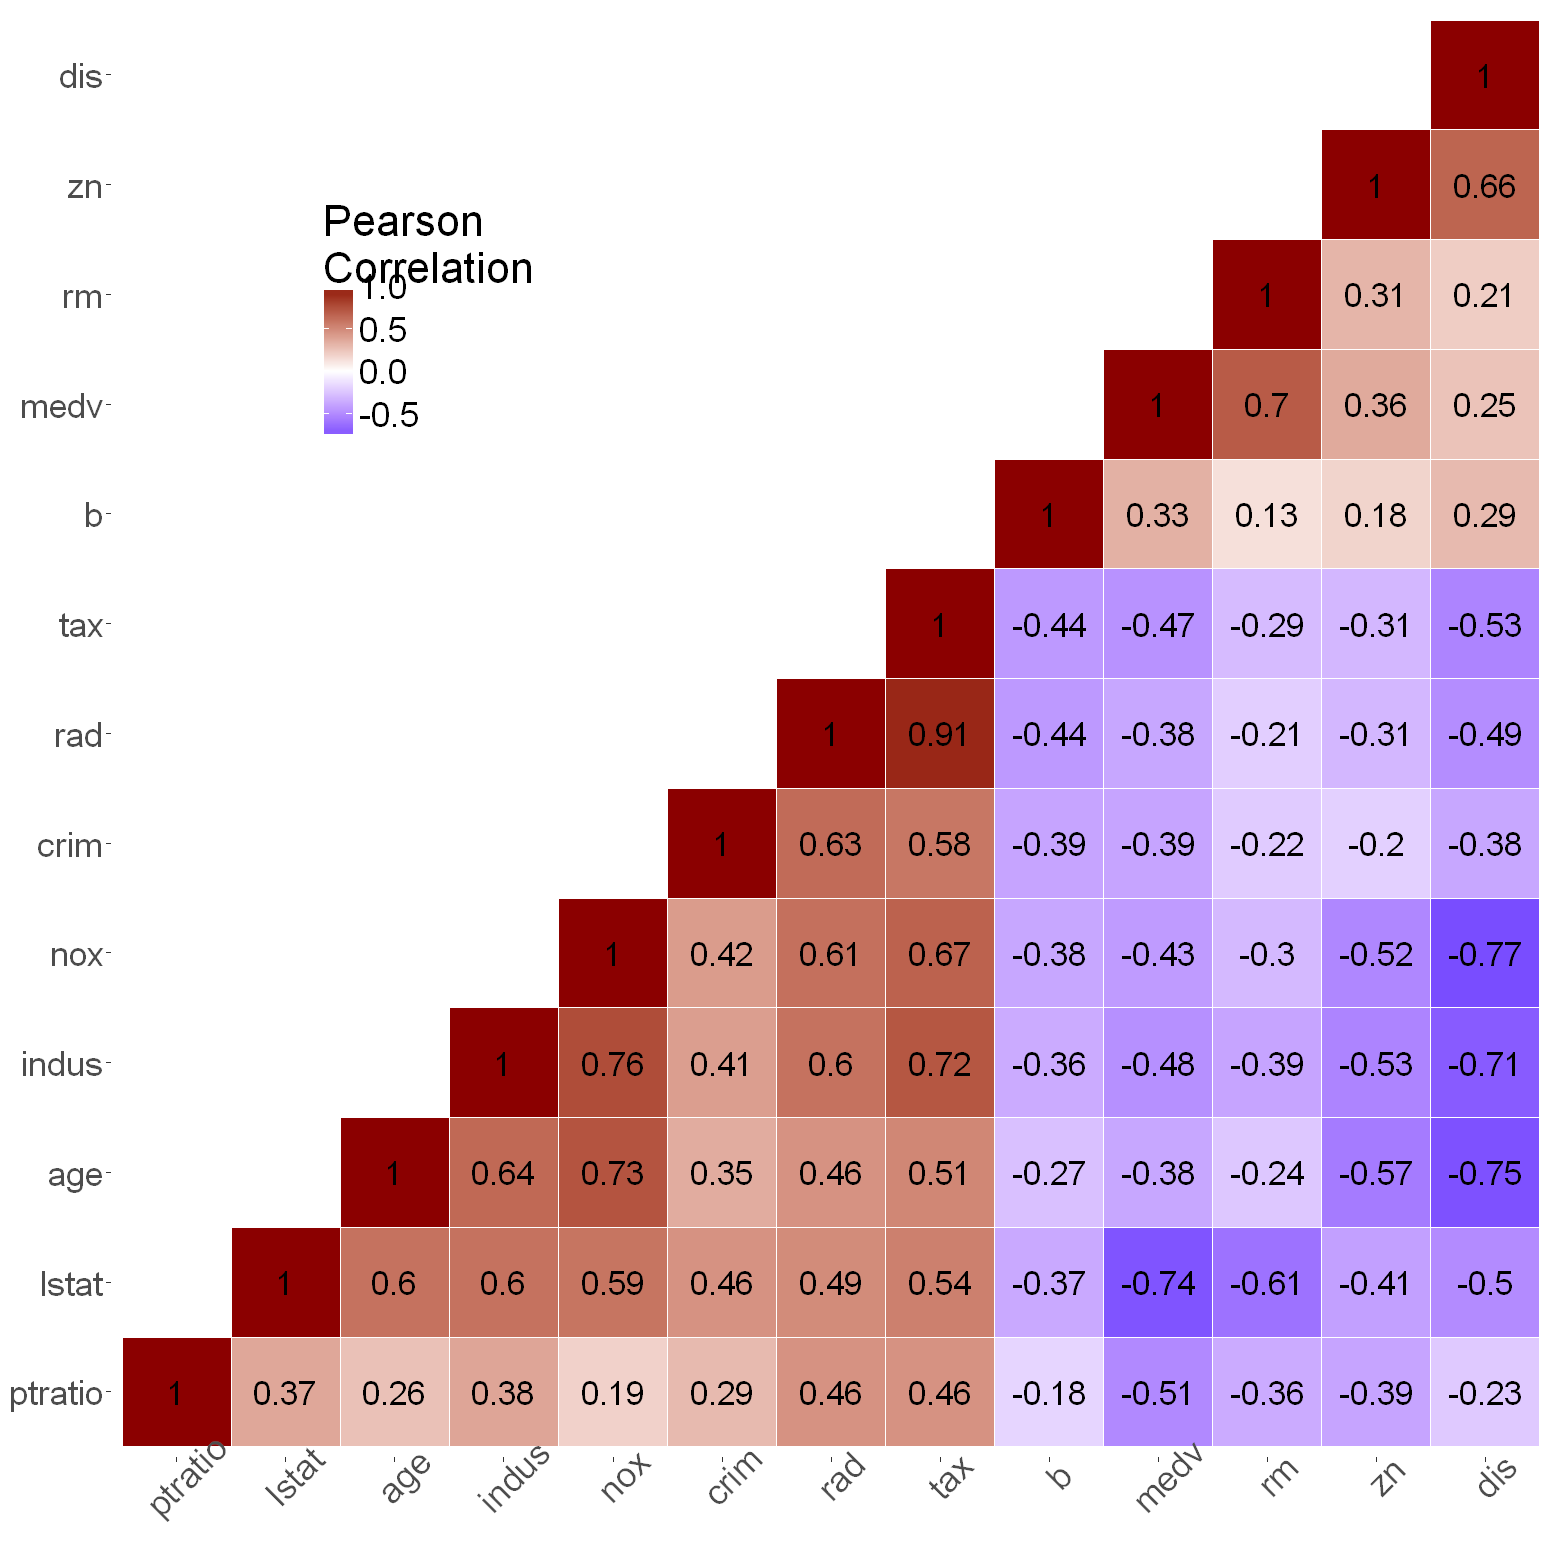

In [23]:
source('../src/corr_heatmap.r')
map <- corr_heatmap(bh2)
map

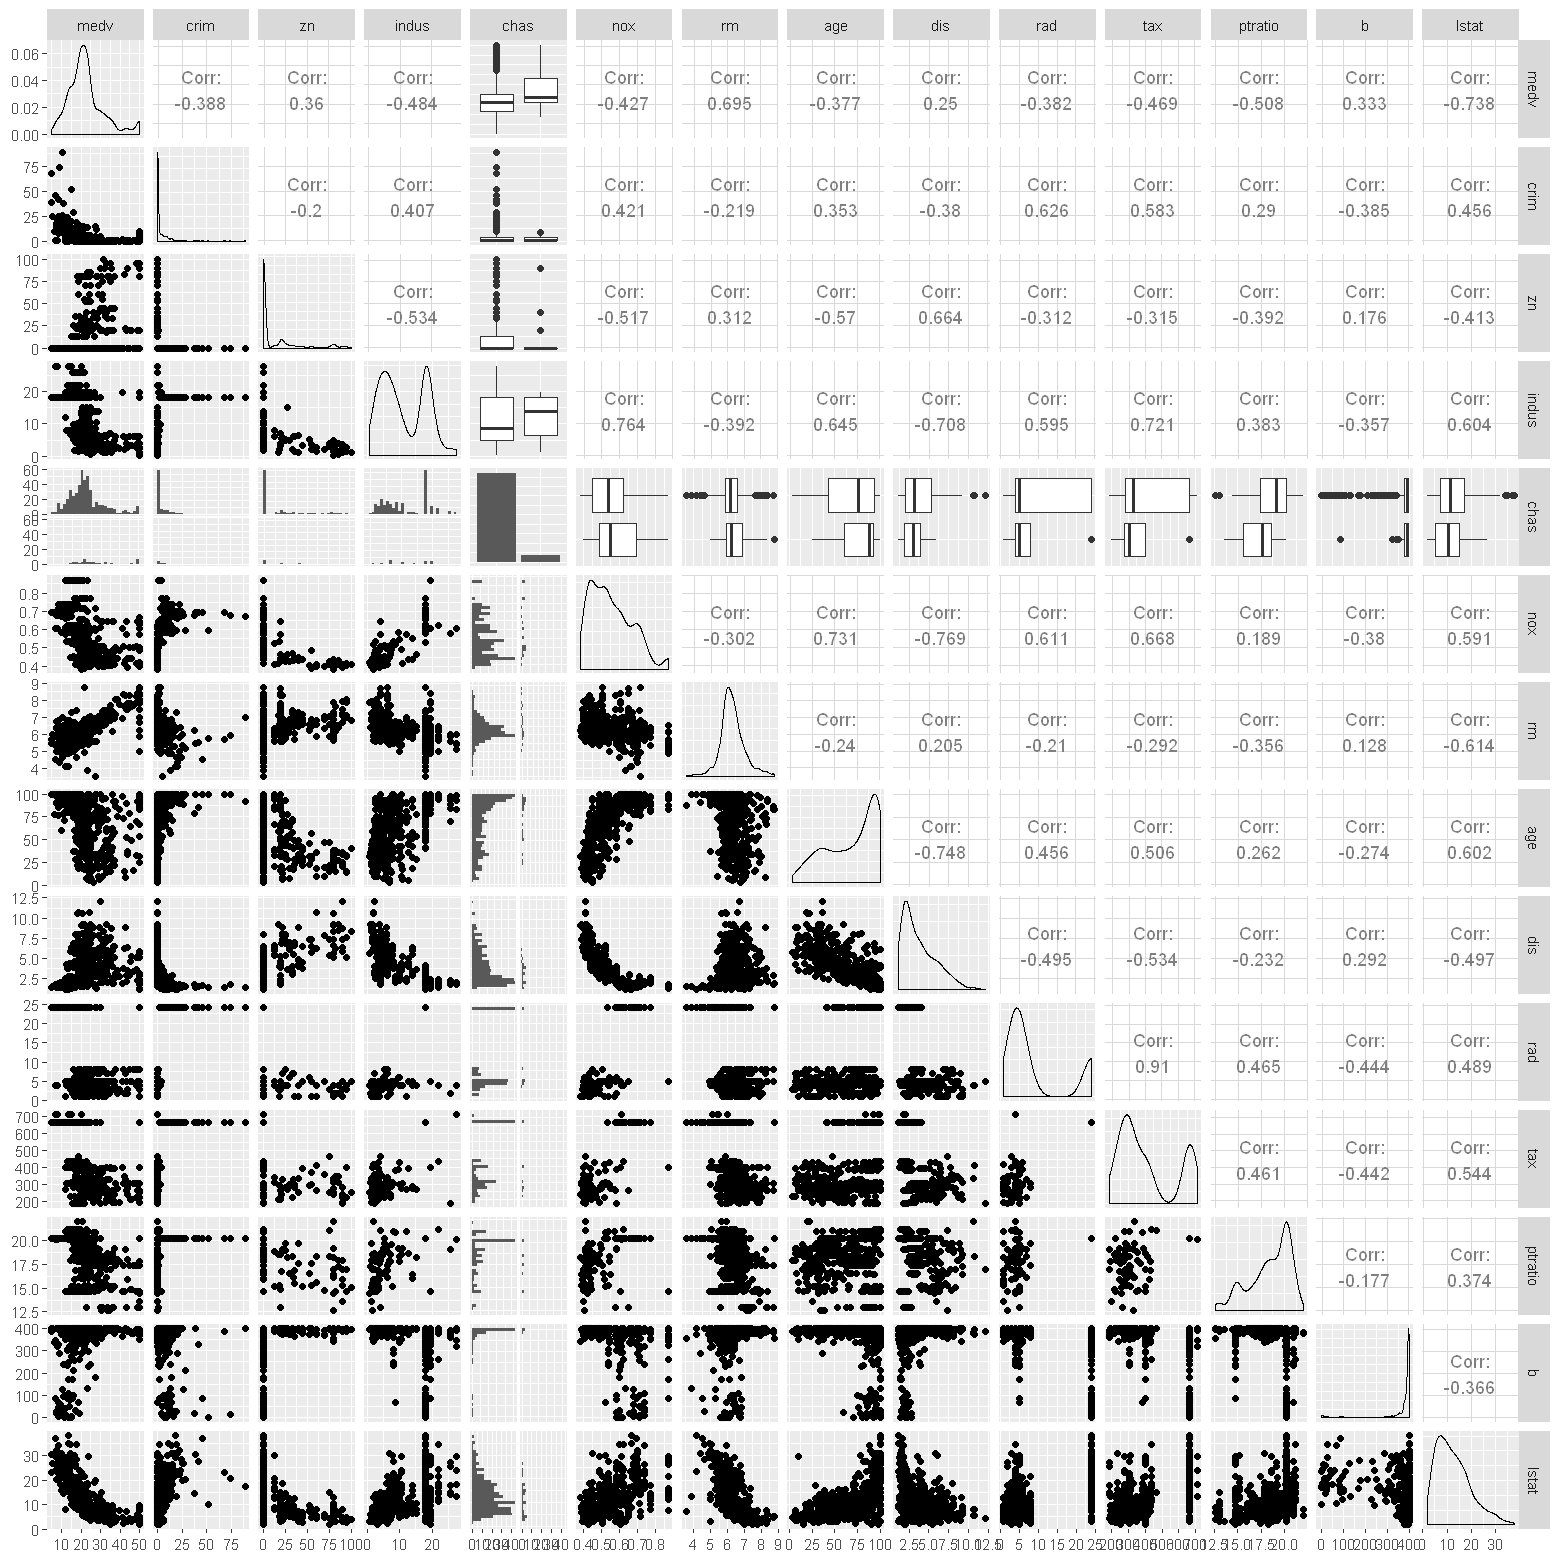

In [25]:
suppressMessages(print(ggpairs(bh2)))